<a href="https://colab.research.google.com/github/yunseoLee0343/embedded/blob/yunseo/embedded_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load datasets

import os

dataset_dir = '/content/drive/MyDrive/face_features_88' # change to your dataset directory
image_paths = [os.path.join(dataset_dir, fname) for fname in os.listdir(dataset_dir) if fname.endswith('.jpg')]

In [ ]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 20.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 21.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


In [ ]:
# Extract ROI of face segment by YOLO(face detection) and OpenCV(ROI)

from ultralytics import YOLO
import mediapipe as mp
import pandas as pd

data = []
model = YOLO('yolov8s.pt')
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5)

100%|██████████| 21.5M/21.5M [00:00<00:00, 125MB/s]


In [ ]:
import numpy as np

def extract_landmarks(rgb_image):
    result = face_mesh.process(rgb_image)
    if result.multi_face_landmarks:
        print(f"Number of faces detected: {len(result.multi_face_landmarks)}")
        landmarks = result.multi_face_landmarks[0]
        return [(lm.x, lm.y, lm.z) for lm in landmarks.landmark]
    return None

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# 감지된 얼굴과 특징을 포함한 이미지를 저장할 리스트
result_images = []
temp = []

def use_result(results):
  if (results and results[0]):
    # print("YOLOv8 Result = ", results[0].__dict__)
    # print("YOLOv8 Result.boxes = ", results[0].boxes)
    print("YOLOv8 Result.boxes.xyxy = ", results[0].boxes.xyxy)

for path in image_paths:
    print(image_paths)
    image = cv2.imread(path)  # 이미지 로드
    if image is None:
        print(f"Error: Failed to load image at {path}")
        continue  # 이미지 로드 실패 시 다음 이미지로 넘어감

    results = model(image)  # YOLO를 사용하여 얼굴 감지
    use_result(results)
    temp.append(results)

['/content/drive/MyDrive/face_features_88/face features_52.jpg', '/content/drive/MyDrive/face_features_88/humans faces_91.jpg', '/content/drive/MyDrive/face_features_88/face features_49.jpg', '/content/drive/MyDrive/face_features_88/face features_67.jpg', '/content/drive/MyDrive/face_features_88/face features_18.jpg', '/content/drive/MyDrive/face_features_88/face features_24.jpg', '/content/drive/MyDrive/face_features_88/face features_17.jpg', '/content/drive/MyDrive/face_features_88/humans faces_100.jpg', '/content/drive/MyDrive/face_features_88/face features_66.jpg', '/content/drive/MyDrive/face_features_88/face features_85.jpg', '/content/drive/MyDrive/face_features_88/humans faces_93.jpg', '/content/drive/MyDrive/face_features_88/face features_88.jpg', '/content/drive/MyDrive/face_features_88/face features_81.jpg', '/content/drive/MyDrive/face_features_88/face features_25.jpg', '/content/drive/MyDrive/face_features_88/face features_87.jpg', '/content/drive/MyDrive/face_features_88/

ROI 1


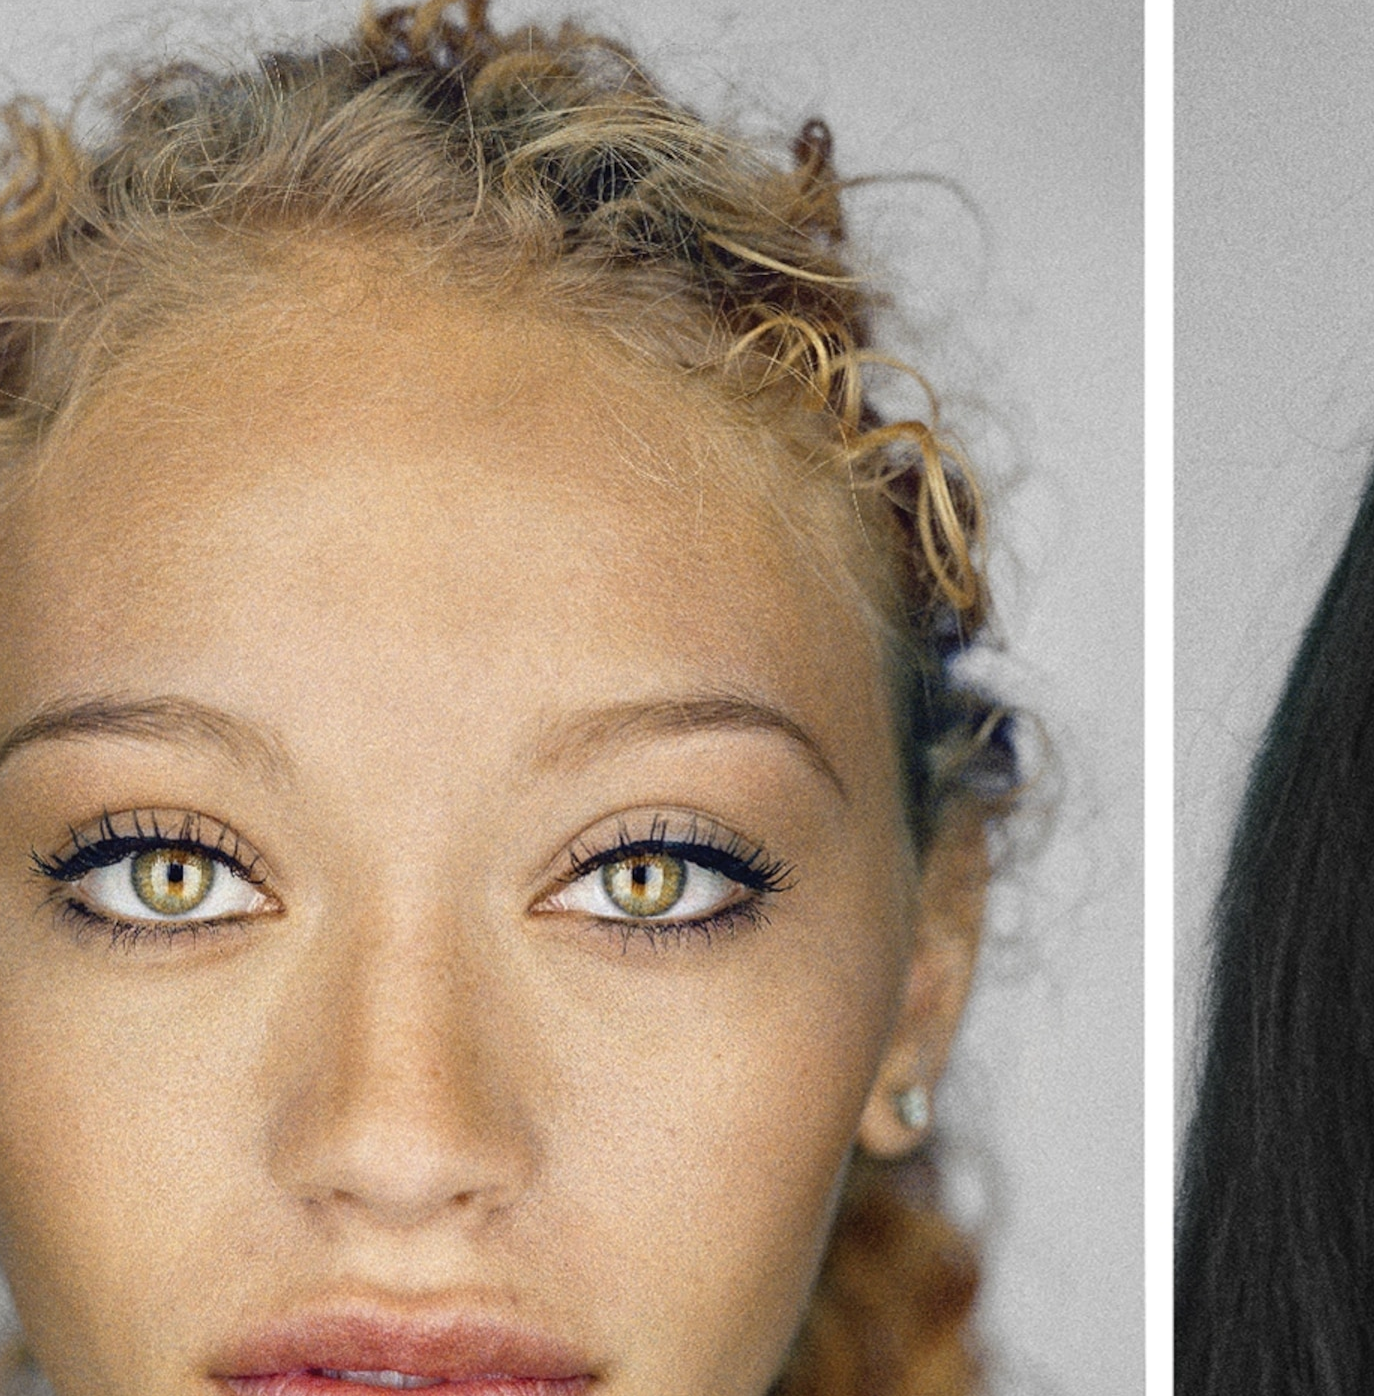

In [ ]:
"""
Therefore, the images displayed in the above code correspond to the ROI images extracted for each detected feature (face, eyes, nose, mouth).
This allows for visual confirmation of how the ROI for each feature was extracted.
"""

# face, eyes, nose, mouth 등의 클래스 ID 정의
FACE_CLASS_ID = 0
EYES_CLASS_ID = 1
NOSE_CLASS_ID = 2
MOUTH_CLASS_ID = 3

# 이미지에서 얼굴, 눈, 코, 입의 ROI를 추출하는 함수
def extract_face_features(results):
    face_features = []
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0].cpu().numpy())
            class_id = box.cls[0].item()
            if class_id == FACE_CLASS_ID:
                face_roi = image[y1:y2, x1:x2]
                face_features.append(face_roi)
            elif class_id == EYES_CLASS_ID:
                eyes_roi = image[y1:y2, x1:x2]
                face_features.append(eyes_roi)
            elif class_id == NOSE_CLASS_ID:
                nose_roi = image[y1:y2, x1:x2]
                face_features.append(nose_roi)
            elif class_id == MOUTH_CLASS_ID:
                mouth_roi = image[y1:y2, x1:x2]
                face_features.append(mouth_roi)
    return face_features

# temp 리스트에 저장된 감지 결과에서 ROI 추출
for results in temp:
    face_features = extract_face_features(results)
    result_images.extend(face_features)

# 결과 이미지 출력
print("ROI 1")
cv2_imshow(result_images[0])

In [ ]:
# 이미지에서 얼굴, 눈, 코, 입의 ROI를 추출하는 함수
def extract_face_features(results):
    face_features = []
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0].cpu().numpy())
            class_name = box.name
            if class_name == "face":
                face_roi = image[y1:y2, x1:x2]
                face_features.append(face_roi)
            elif class_name == "eyes":
                eyes_roi = image[y1:y2, x1:x2]
                face_features.append(eyes_roi)
            elif class_name == "nose":
                nose_roi = image[y1:y2, x1:x2]
                face_features.append(nose_roi)
            elif class_name == "mouth":
                mouth_roi = image[y1:y2, x1:x2]
                face_features.append(mouth_roi)
    return face_features

# temp 리스트에 저장된 감지 결과에서 ROI 추출
for results in temp:
    face_features = extract_face_features(results)
    result_images.extend(face_features)

# 결과 이미지 출력
print("ROI 1")
cv2_imshow(result_images[0])